In [42]:
import numpy as np
import matplotlib.pyplot as plt

#  Импортируем модуль для работы с анимацией:
import matplotlib.animation as animation

from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib import cm

In [36]:
# Зададим размеры массивов пространства (расчётной области)
Nx = 100
Ny = 200

# Задаём шаги по пространству и времени
dx = 1
dy = 1

dt= 1e-9 # условие устойчивости метода (условие Куранта)

imp0 = 120 * np.pi # сопротивление свободного пространства
mu0 = 4*np.pi * 1e-7
eps0 = mu0 / (imp0 * imp0)

eps = 1
mu = 1

eps_a = eps0 * eps
mu_a = mu0 * mu


# Координаты источника, коэффициент относительно длин массивов
i_source = 0.75
j_source = 0.3

tau = 100*dt # длительность импульса по времени

In [27]:
# Зададим функцию для источника

def Gauss(t):
    return np.exp(-t*t)

def Source(t, tau):
    return Gauss((t-tau)/(tau/3))

t = np.arange(0, 400*dt, dt)
s = Source(t, 100*dt)

# plt.style.use('seaborn')
# plt.plot(t, s)
# plt.show()

In [28]:
def UpdateH(Hx, Hy, Hz, Ex, Ey, Ez):
    c_HE = dt / mu_a # константа для поля H для расчёта с полем E
    for i in range(0, Nx-1):
        for j in range(0, Ny-1):
            Hx[i,j] = Hx[i,j] - c_HE * (+(Ez[i, j+1] - Ez[i,j])) / dy
            Hy[i,j] = Hy[i,j] - c_HE * (-(Ez[i+1, j] - Ez[i,j])) / dx
            Hz[i,j] = Hz[i,j] - c_HE * ((Ey[i+1, j] - Ey[i,j]) / dx - (Ex[i, j+1] - Ex[i,j]) / dy)

def UpdateE(Hx, Hy, Hz, Ex, Ey, Ez):
    c_EH = dt / eps_a # константа для поля Е для расчёта с полем H
    for i in range(1, Nx):
        for j in range(1, Ny):
            Ex[i,j] = Ex[i,j] + c_EH * (+(Hz[i,j] - Hz[i, j-1])) / dy
            Ey[i,j] = Ey[i,j] + c_EH * (-(Hz[i,j] - Hz[i-1, j])) / dx
            Ez[i,j] = Ez[i,j] + c_EH * ((Hy[i,j] - Hy[i-1, j]) / dx - (Hx[i,j] - Hx[i, j-1]) / dy)

def SetSourceEz(Ez, t: float):
    i = int(i_source * len(Ez))
    j = int(j_source * len(Ez[0]))
    Ez[i][j] += Source(t, tau)

def GetField(Nt: int):
    Ex = np.zeros((Nx, Ny), dtype = float)
    Ey = np.zeros((Nx, Ny), dtype = float)
    Ez = np.zeros((Nx, Ny), dtype = float)

    Hx = np.zeros((Nx, Ny), dtype = float)
    Hy = np.zeros((Nx, Ny), dtype = float)
    Hz = np.zeros((Nx, Ny), dtype = float)

    for n in range(0, Nt, 1):
        UpdateH(Hx, Hy, Hz, Ex, Ey, Ez)
        UpdateE(Hx, Hy, Hz, Ex, Ey, Ez)
        SetSourceEz(Ez, n*dt)

    return Ez

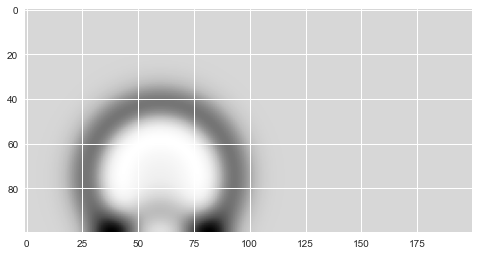

In [37]:
Ez = GetField(200)

plt.style.use('seaborn')
# plt.plot(Ez)
# plt.show()


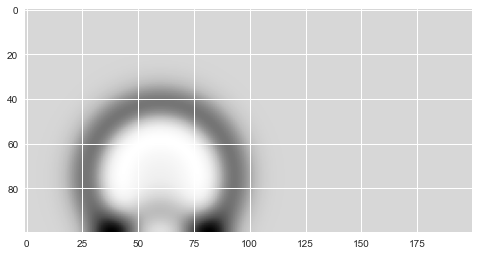

In [49]:
plt.imshow(Ez)
plt.show()

In [94]:
# Make data.
X = np.arange(0, Nx, dx)
Y = np.arange(0, Ny, dy)

# print(len(X))
print(np.shape(X))
print(np.shape(Y))

Y, X = np.meshgrid(Y, X)
print(np.shape(X))
print(np.shape(Y))

(100,)
(200,)
(100, 200)
(100, 200)


In [105]:
R = np.sqrt(X**2 + Y**2)
Z = R
print(np.shape(Z))
print(np.shape(Ez))

np.max(Ez)

(100, 200)
(100, 200)


0.06597427899610257

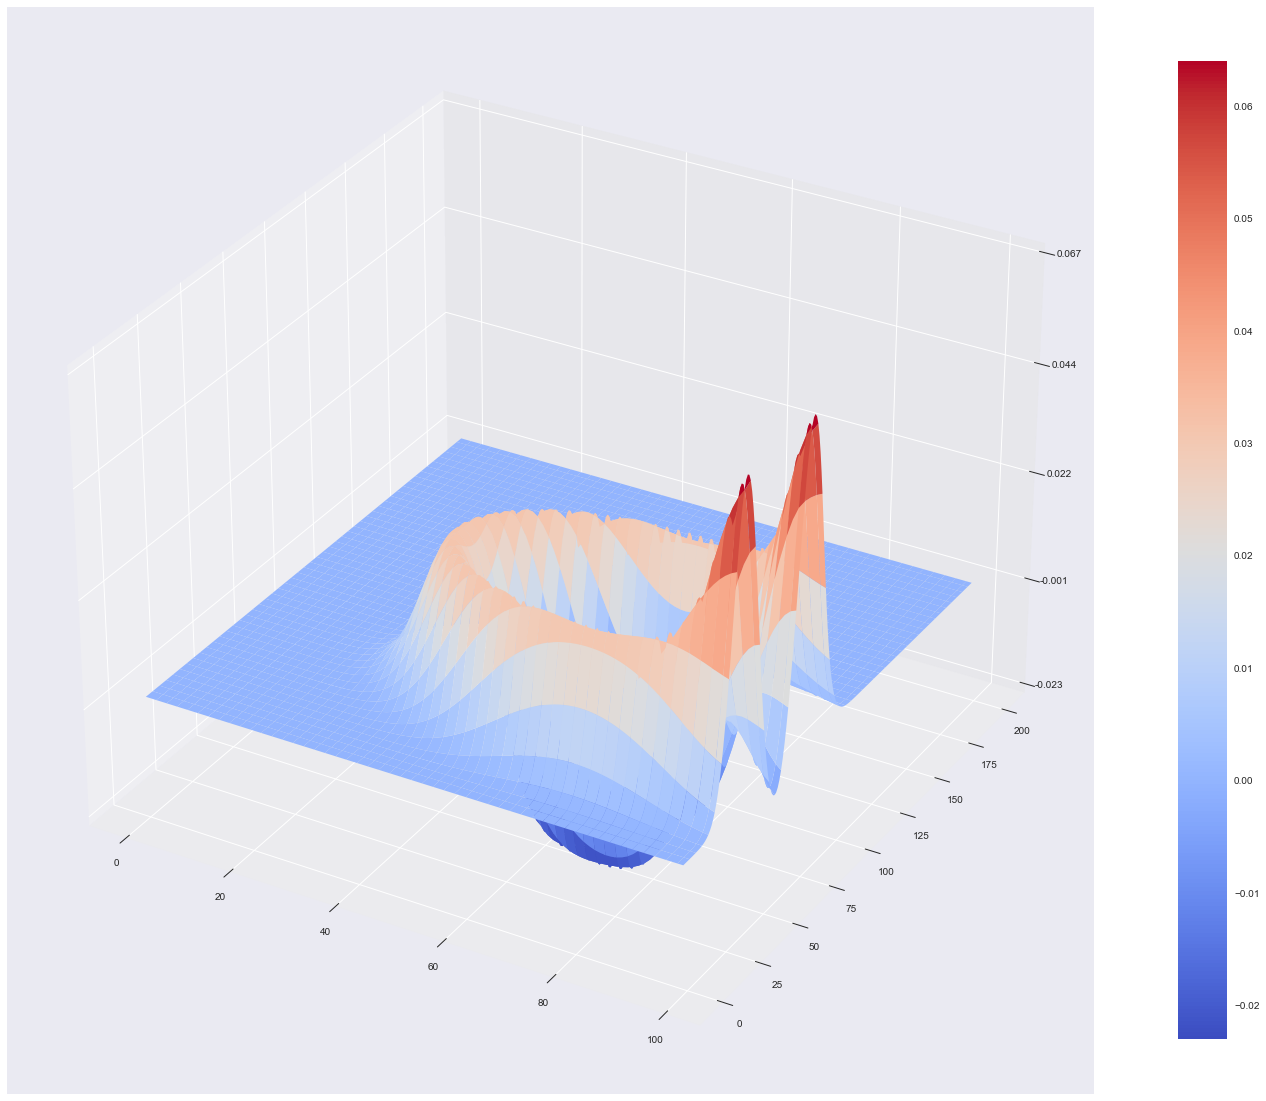

In [136]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (30,20))

# Plot the surface.
surf = ax.plot_surface(X, Y, Ez, cmap=cm.coolwarm,
                       linewidth=1, antialiased=True)

# Customize the z axis.
ax.set_zlim(1.01*np.min(Ez), 1.01*np.max(Ez)) # пределы оси
ax.zaxis.set_major_locator(LinearLocator(5)) # количество делений по оси z
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.03f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.9, aspect=20)

plt.show()